In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
# Calculate the R-Squared
from scipy.stats import linregress

In [2]:
data = pd.read_csv('adult.csv')
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [3]:
# Another copy of the data.
df = data.copy()
df.info()

1- How many records in the dataset contain missing values in any of the columns?

In [5]:
# The null values are represented as a question mark.
null_values = df.isin(['?']).sum()
null_values

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [6]:
# Another summation to add all the null values.
null_values.sum()

6465

In [7]:
# Drop all the rows which contain the missing values "?".
df = df.drop(df[df.isin(['?']).any(axis=1)].index)
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


2- What is the average age of individuals in each work class category?

In [8]:
# Group each work class category based on the average age of individuals
Average_age = df.groupby('workclass')['age'].mean().round(2)
Average_age

workclass
Federal-gov         42.59
Local-gov           41.65
Private             36.89
Self-emp-inc        45.80
Self-emp-not-inc    45.37
State-gov           39.53
Without-pay         47.29
Name: age, dtype: float64

3- Visualize the distribution of hours worked per week and describe what you observe

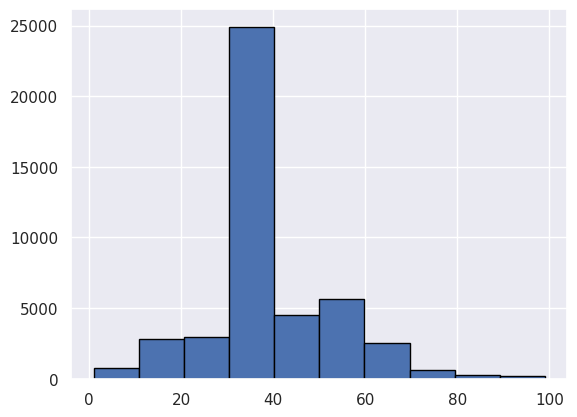

In [9]:
# Histogram
Hours_distribution = df['hours-per-week'].hist(bins=10, edgecolor='black')

4- Investigate the relationship between age and hours worked per week and provide your findings

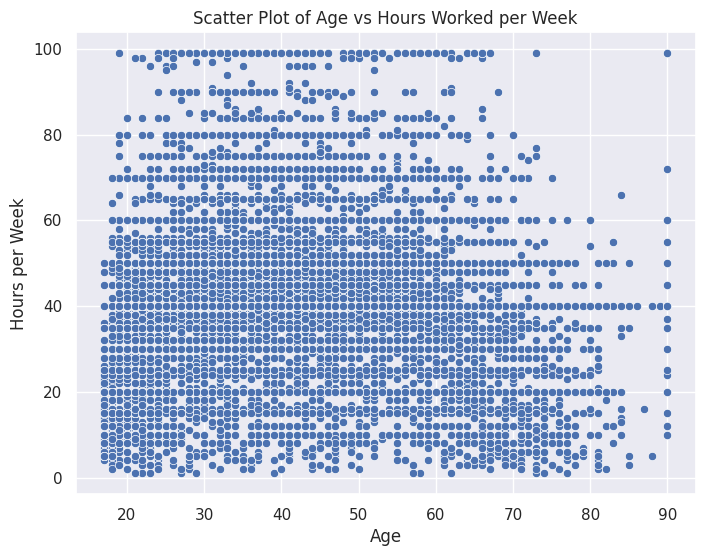

In [10]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='age', y='hours-per-week')
plt.title('Scatter Plot of Age vs Hours Worked per Week')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.show()

In [11]:
# Correlation Analysis
correlation = df['age'].corr(df['hours-per-week']).round(3)
print("Correlation between Age and Hours Worked per Week:", correlation)

Correlation between Age and Hours Worked per Week: 0.102


In [12]:
# R-Squared measure
R_squared = linregress(df['age'], df['hours-per-week']).rvalue** 2
print("R-squared:", R_squared.round(4))

R-squared: 0.0104


Based on the correlation coefficient and the R^2 result:

The correlation coefficient of 0.102 suggests a very weak positive correlation between age and hours worked per week. This indicates that there is little linear relationship between age and hours worked per week in the dataset.

Also, the low R^2 value of 0.0104 indicates that only approximately 1.04% of the variance in hours worked per week can be explained by age using the linear regression model. This suggests that age alone is not a strong predictor of the number of hours worked per week in the dataset.

5- Among individuals with a capital loss greater than 0, what proportion earn more than $50K?

In [13]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [14]:
# Create a new df that only show the rows that contain capital loss > 0
proportion = df[df['capital-loss'] > 0]

<Axes: ylabel='count'>

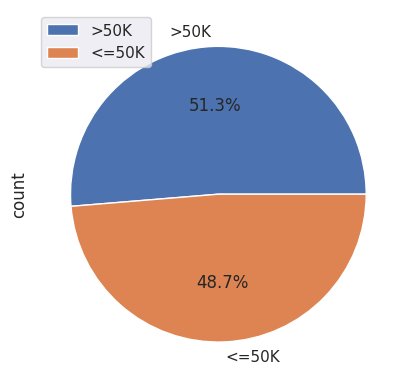

In [15]:
# Pie chart
proportion['income'].value_counts().plot(kind='pie', legend=True, autopct='%1.1f%%')

 6- Identify the education level that shows the largest increase in the proportion of individuals earning more than $50K compared to the next lower education level

In [16]:
# Check the number + values of the education column
print(df['education'].nunique() , "\n", df['education'].unique())

16 
 ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' '5th-6th' 'Assoc-voc' '9th' 'Doctorate'
 '12th' '1st-4th' 'Preschool']


In [17]:
# The df that contain income > 50K
Education_proportion = df[df['income'] == '>50K']
Education_proportion

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
14,48,Private,279724,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3103,0,48,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48819,38,Private,139180,Bachelors,13,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,>50K
48826,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
48835,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


<Axes: ylabel='count'>

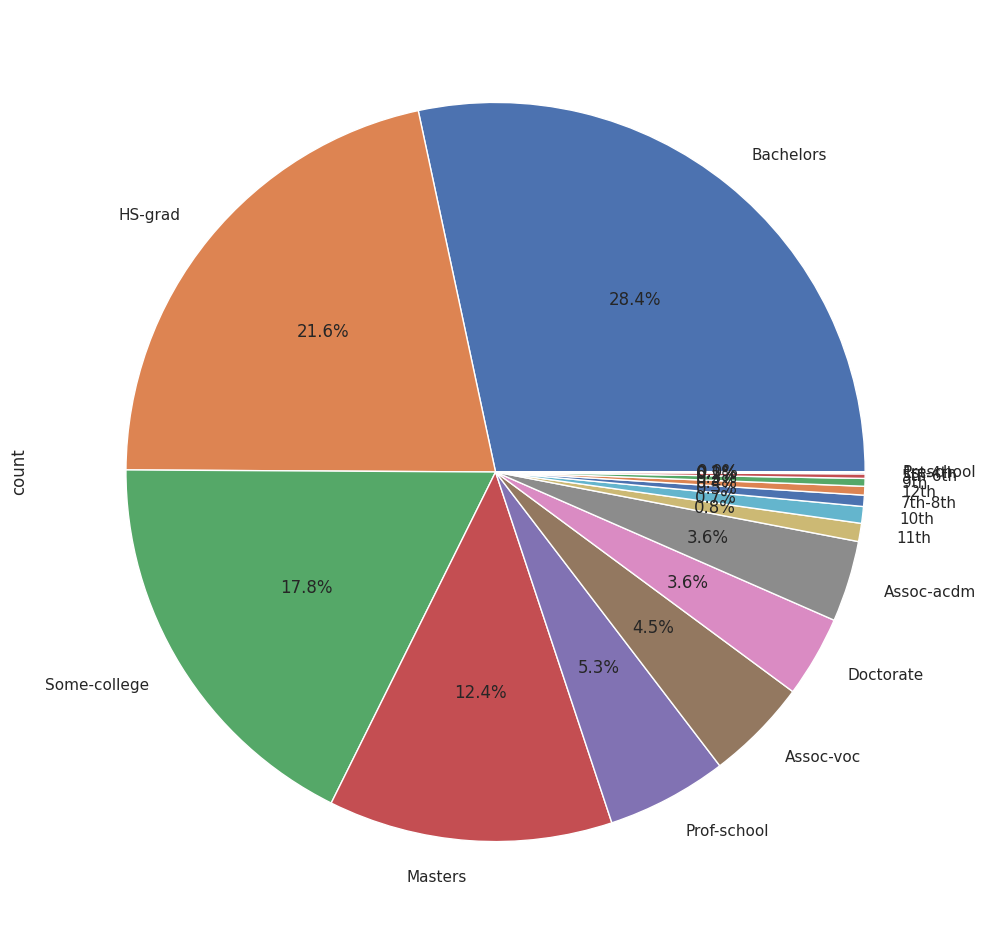

In [18]:
# Pie chart
Education_proportion['education'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(20, 12))

In [19]:
# Calculate the values of each item, and then find the difference between each value
x = Education_proportion['education'].value_counts().diff()
x

education
Bachelors         NaN
HS-grad        -762.0
Some-college   -426.0
Masters        -597.0
Prof-school    -801.0
Assoc-voc       -88.0
Doctorate      -105.0
Assoc-acdm       -1.0
11th           -309.0
10th             -7.0
7th-8th         -27.0
12th            -12.0
9th              -5.0
5th-6th         -16.0
1st-4th         -14.0
Preschool        -7.0
Name: count, dtype: float64

In [20]:
# Show the maximum difference
x.idxmax()

'Assoc-acdm'

 7- Create a new feature categorizing income into different brackets based on capital gain and loss.  Define your categorization criteria

In [21]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [27]:
# Define categorization criteria
def categorize_income(row):
    income_category = row['income']
    total_capital = row['capital-gain'] - row['capital-loss']

    if income_category == '<=50K':
        return np.where(total_capital <= 0, 'Low Income',
                        np.where((total_capital > 0) & (total_capital <= 5000), 'Medium Income', 'High Income'))
    elif income_category == '>50K':
        return np.where(total_capital <= 0, 'Medium Income',
                        np.where((total_capital > 0) & (total_capital <= 5000), 'High Income', 'Very High Income'))

# Apply categorization criteria and create a new feature 'Income_Category'
df['Income_Category'] = df.apply(categorize_income, axis=1)

df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Income_Category,OccupationType
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,Low Income,Machine
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,Low Income,Farming
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,Medium Income,Protective
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,Very High Income,Machine
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,Low Income,Other
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,High Income,Prof
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K,Low Income,Other
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K,Low Income,Craft
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K,Very High Income,Machine
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K,Low Income,Adm


 8- Determine the most common work class for each combination of race and gender

In [28]:
# Group the data based on race and gender, and then find the values of the grouped items based on their occupation. 
# Print the first item of each result (by default it's sorted, so the first value contain the most occurrences)
Most_common_work_class = data.groupby(['race', 'gender'])['workclass'].agg(lambda x: x.value_counts().index[0])

# Print the results
print("Most common work class for each combination of race and gender:")
print(Most_common_work_class)

Most common work class for each combination of race and gender:
race                gender
Amer-Indian-Eskimo  Female    Private
                    Male      Private
Asian-Pac-Islander  Female    Private
                    Male      Private
Black               Female    Private
                    Male      Private
Other               Female    Private
                    Male      Private
White               Female    Private
                    Male      Private
Name: workclass, dtype: object


9- Extract the first word from the 'occupation' column to create a new 'OccupationType' column. How many unique occupation types are identified?

In [29]:
# Extract the first word from the 'occupation' column
df['OccupationType'] = df['occupation'].str.split('-').str[0].str.split().str[0]

unique_occupation_types = df['OccupationType'].nunique()

print("Number of unique occupation types identified:", unique_occupation_types)

Number of unique occupation types identified: 14


In [30]:
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,Income_Category,OccupationType
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,Low Income,Machine
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,Low Income,Farming
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,Medium Income,Protective
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,Very High Income,Machine
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,Low Income,Other
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,High Income,Prof
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K,Low Income,Other
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K,Low Income,Craft
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K,Very High Income,Machine
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K,Low Income,Adm
